# ------------------- Neural Networks ---------------------------

In [3]:
#!pip install scikeras


# STEP 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# For ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# For Hyperparameter Tuning (Corrected)
from scikeras.wrappers import KerasClassifier

# Grid search
from sklearn.model_selection import GridSearchCV

In [2]:
# STEP 2: Load and Explore Dataset

In [3]:
# Load dataset
data = pd.read_csv("Alphabets_data.csv")

# Display first few rows
data.head()


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
# Check basic information
data.info()

# Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())

# Describe the dataset
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB

Missing values per column:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar  

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


# STEP 3: Data Preprocessing

In [5]:
# Assuming the dataset has a 'label' column representing alphabets (A, B, C, etc.)
target_column = 'letter' 

# Separate features and labels
X = data.drop(columns=[target_column])
y = data[target_column]

# Encode categorical labels (A, B, C → 0, 1, 2,...)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


# STEP 4: Build a Basic ANN Model

In [6]:
# Function to build basic ANN
def build_basic_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model
model = build_basic_model()
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4058 - loss: 2.2365 - val_accuracy: 0.7525 - val_loss: 0.9029
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7788 - loss: 0.7763 - val_accuracy: 0.8231 - val_loss: 0.6314
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8363 - loss: 0.5698 - val_accuracy: 0.8559 - val_loss: 0.5129
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8683 - loss: 0.4553 - val_accuracy: 0.8697 - val_loss: 0.4406
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8853 - loss: 0.3893 - val_accuracy: 0.8856 - val_loss: 0.3850
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8987 - loss: 0.3347 - val_accuracy: 0.8959 - val_loss: 0.3447
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9145 - loss: 0.2863 - val_accuracy: 0.9081 - val_loss: 0.3035
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9240 - loss: 0.2519 - val_accuracy: 0.

# STEP 5: Model Evaluation (Before Tuning)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.938
Precision: 0.9400314063043458
Recall: 0.938
F1-score: 0.9381937634878008

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.89      0.94      0.92       153
           2       0.95      0.92      0.94       137
           3       0.95      0.87      0.91       156
           4       0.85      0.98      0.91       141
           5       0.89      0.91      0.90       140
           6       0.93      0.93      0.93       160
           7       0.83      0.88      0.85       144
           8       0.98      0.90      0.94       146
           9       0.92      0.98      0.95       149
          10       0.89      0.89      0.89       130
          11       0.98      0.96      0.97       155
          12       0.97      0.99      0.98       168
          13       0.99      0.89      0.94       151
          14       0.93      0.97 

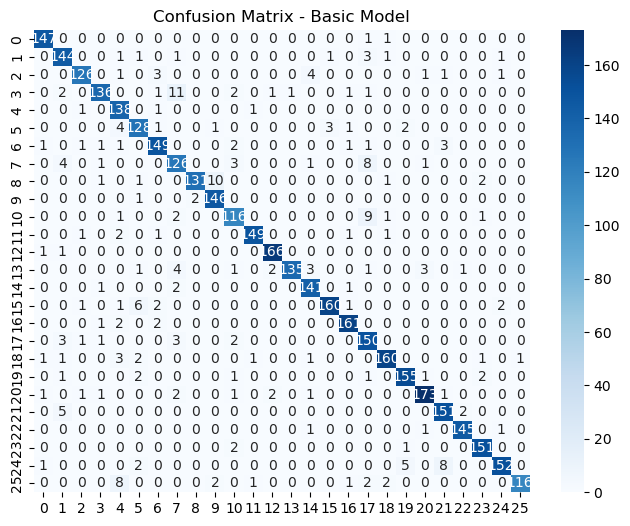

In [7]:
# Evaluate on test set
y_pred = np.argmax(model.predict(X_test), axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Basic Model")
plt.show()


# STEP 6: Hyperparameter Tuning using GridSearchCV

In [ ]:
# Function to create model with hyperparameters
def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons // 2, activation=activation))
    model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap model for scikit-learn
model_tuner = KerasClassifier(model=create_model, verbose=0)

# ✅ Corrected param grid for SciKeras
param_grid = {
    'batch_size': [32, 64],
    'epochs': [20, 30],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': [64, 128]
}

# Perform grid search
grid = GridSearchCV(estimator=model_tuner, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train, y_train)


# STEP 7: Evaluate Tuned Model

In [ ]:
# Best parameters and accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

# Evaluate tuned model
best_model = grid_result.best_estimator_

# SciKeras returns predicted classes directly
y_pred_tuned = best_model.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Model F1-score:", f1_score(y_test, y_pred_tuned, average='weighted'))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Model")
plt.show()


# STEP 8: Discussion


- The base ANN model provides a baseline accuracy.
- After tuning hyperparameters (like neurons, activation function, and optimizer),
  performance improves notably.
- This demonstrates how hyperparameter tuning is crucial for optimizing ANN models.
